In [87]:
print("Hello world")

Hello world


## Importing our packages


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
from scipy.stats import f_oneway

## Reading the data

In [89]:
diamonds_xl = pd.read_excel("PricingOfDiamonds.xlsx") # when reading from the samer dir
# diamonds_xl = pd.read_excel("D:\\Github\\Joseph\\Pricing of Diamonds") # reading from different dirz
# diamonds_xl = pd.read_excel("D:/Github/Joseph/Pricing of Diamonds")
diamonds_xl = pd.read_csv("pricingOfDiamonds.csv")

In [90]:
diamonds_xl.head(10)

,ID,carat,cut,colour,clarity,depth,price,x,y,P,PC
0,1,0.23,Ideal,E,SI2,61.5,326,1417.391304,5.300813,Negative,Negative
1,2,0.21,Premium,E,SI1,59.8,326,1552.380952,5.451505,Positive,Negative
2,3,0.23,Good,E,VS1,56.9,327,1421.739130,5.746924,Positve,Negative
3,4,0.29,Premium,I,VS2,62.4,334,1151.724138,5.352564,NR,Negative
4,5,0.31,Good,J,SI2,63.3,335,1080.645161,5.292259,NR,Negative
5,6,0.24,Very Good,J,VVS2,62.8,336,1400.000000,5.350318,SP,Negative
6,7,0.24,Very Good,I,VVS1,62.3,336,1400.000000,5.393258,SN,Negative
7,8,0.26,Very Good,H,SI1,61.9,337,1296.153846,5.444265,SN,Negative
8,9,0.22,Fair,E,VS2,65.1,337,1531.818182,5.176651,Negative,Negative
9,10,0.23,Very Good,H,VS1,59.4,338,1469.565217,5.690236,Negative,Negative


## Dealing with missing values
- Checking for missing values

In [91]:
# missing_values = diamonds_xl.isnull().any()
missing_values = diamonds_xl.isnull().sum()
missing_values

ID          0
carat       0
cut         0
colour      0
clarity     0
depth       0
price       0
x           0
y           0
P          10
PC         10
dtype: int64

<Axes: >

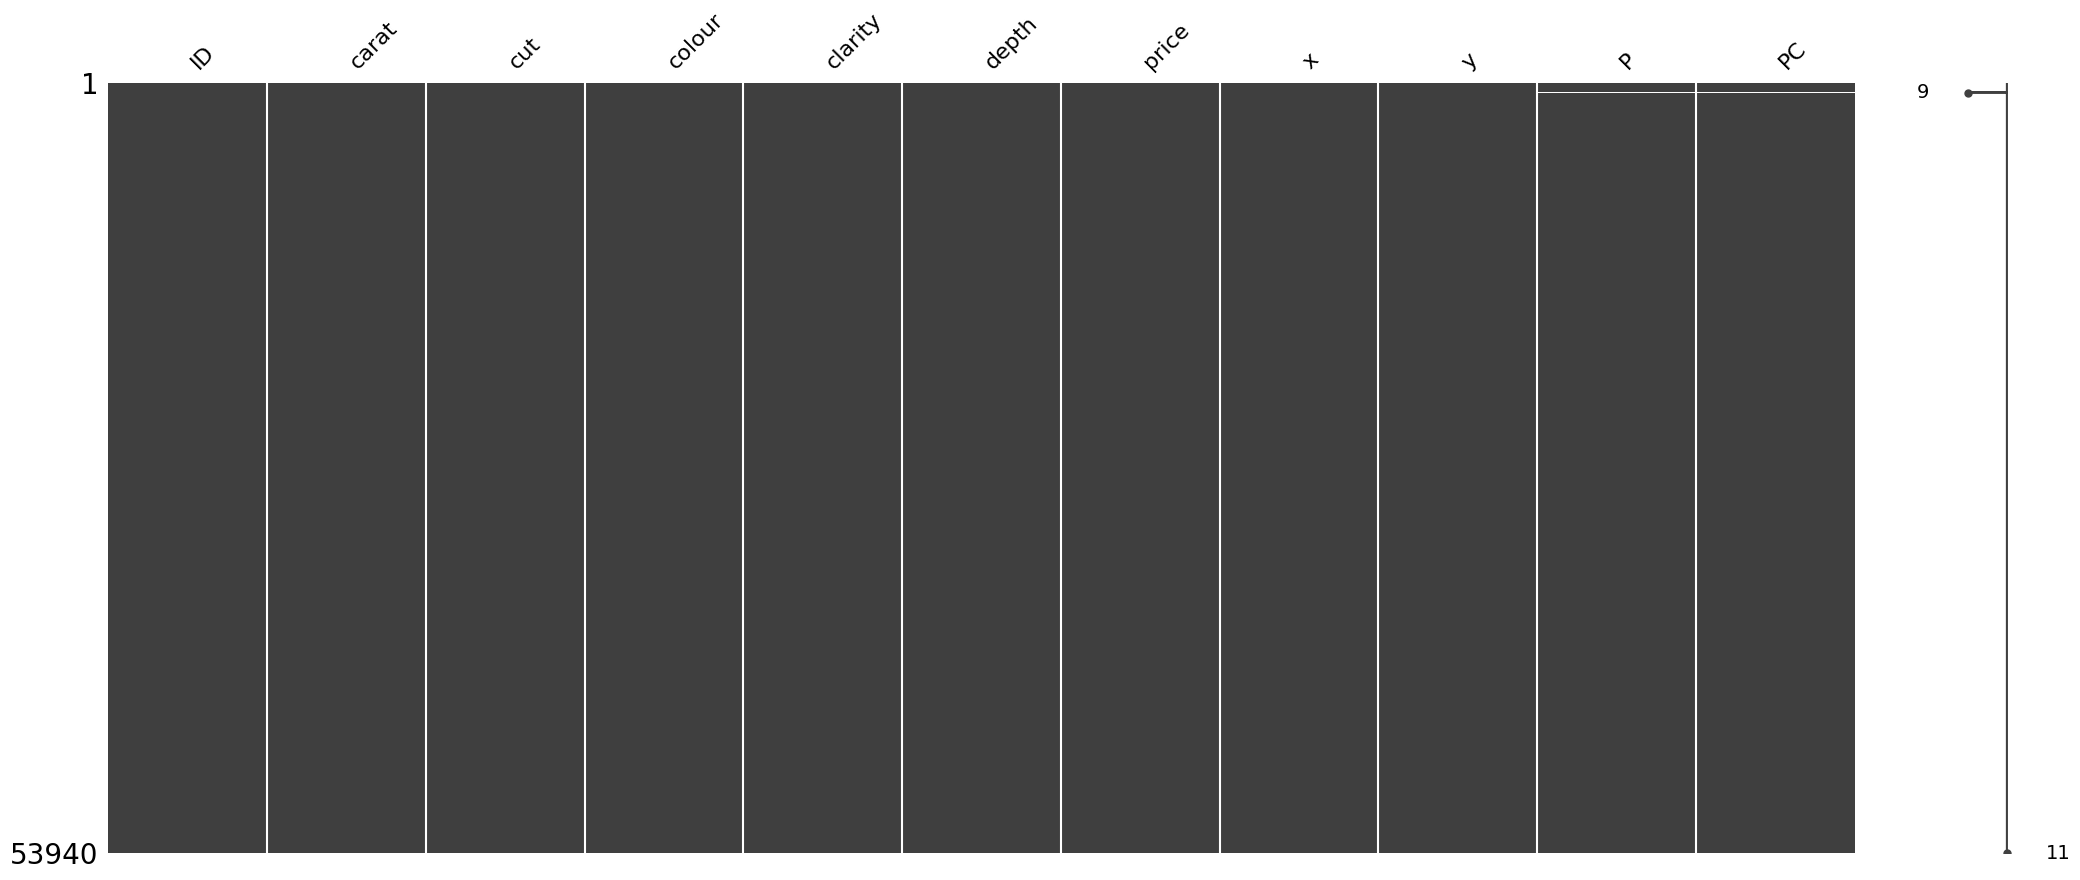

In [92]:
msno.matrix(diamonds_xl)

- i removed ID because its just an auto-incrementing field

In [93]:
diamonds_xl = diamonds_xl.drop(columns=["ID"])

### Removing missing values
- Dropping
- imputation(mean, mode, median)

In [94]:
## getting all cont variables
cont_cols = diamonds_xl.select_dtypes(exclude="object")
# cont_cols = diamonds_xl.select_dtypes(incclude=["int64", "float64"])
cont_cols

,carat,depth,price,x,y
0,0.23,61.5,326,1417.391304,5.300813
1,0.21,59.8,326,1552.380952,5.451505
2,0.23,56.9,327,1421.739130,5.746924
3,0.29,62.4,334,1151.724138,5.352564
4,0.31,63.3,335,1080.645161,5.292259
...,...,...,...,...,...
53935,0.72,60.8,2757,3829.166667,45.345395
53936,0.72,63.1,2757,3829.166667,43.692552
53937,0.70,62.8,2757,3938.571429,43.901274
53938,0.86,61.0,2757,3205.813953,45.196721


- visualization of cont columns

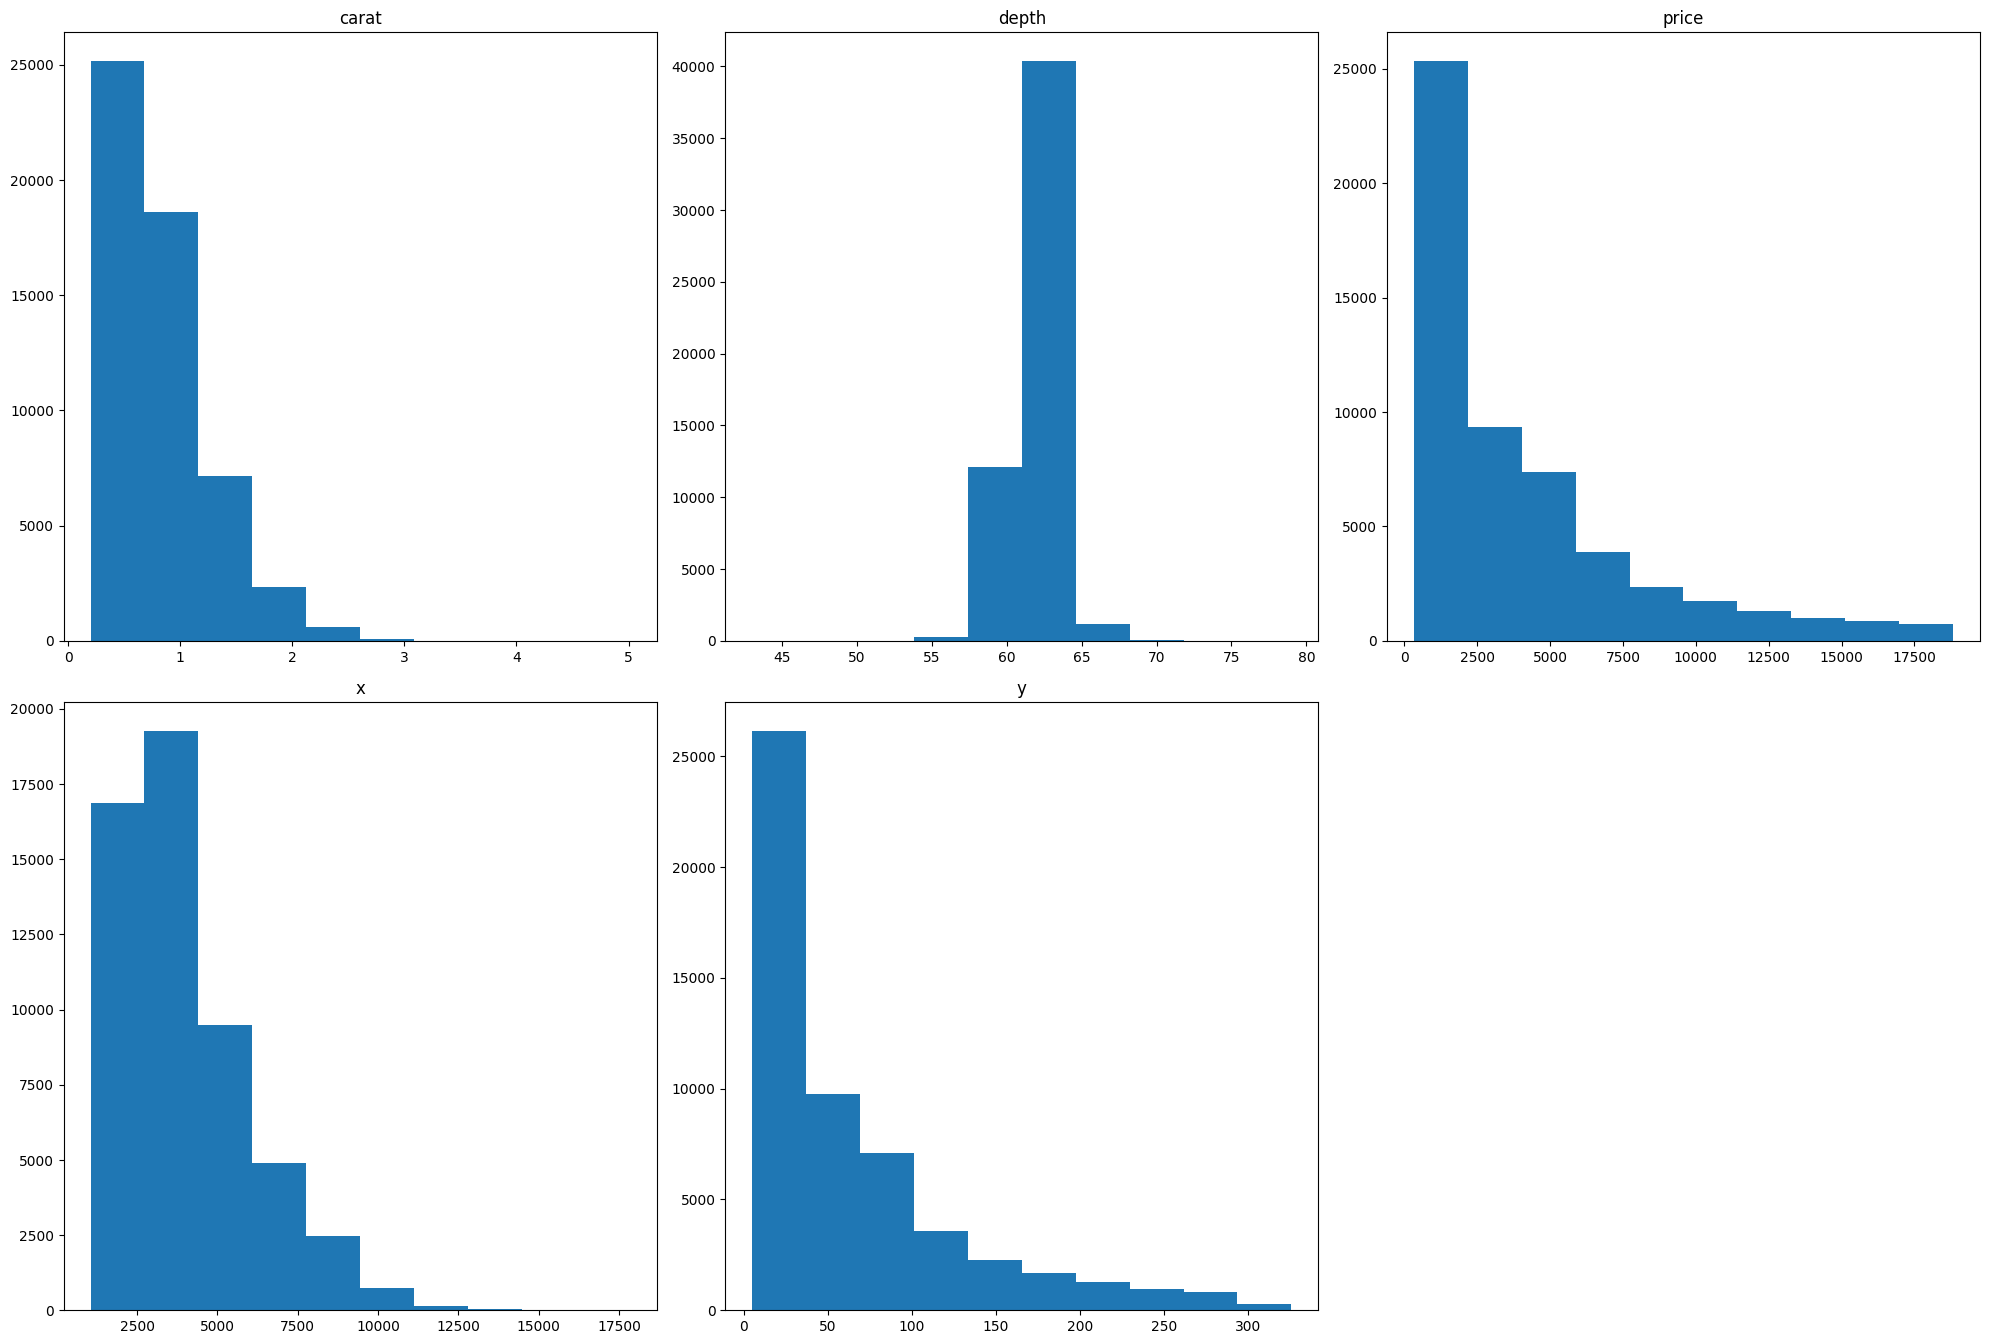

In [95]:
plt.figure(figsize=(20,20))
for i,col in enumerate(cont_cols.columns):
    plt.subplot(3,3, i+1)
    plt.hist(diamonds_xl[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [96]:
##  for skwed data 
diamonds_xl["carat"] = diamonds_xl["carat"].fillna(diamonds_xl["carat"].median())
##  for normalized data 
diamonds_xl["depth"] = diamonds_xl["depth"].fillna(diamonds_xl["depth"].mean())


In [97]:
diamonds_xl["P"] = diamonds_xl["P"].fillna(diamonds_xl["P"].mode()[0])
diamonds_xl["PC"] = diamonds_xl["PC"].fillna(diamonds_xl["PC"].mode()[0])

- cross checking for any missing values left!

In [98]:
missing_values = diamonds_xl.isnull().sum()
missing_values

carat      0
cut        0
colour     0
clarity    0
depth      0
price      0
x          0
y          0
P          0
PC         0
dtype: int64

### Outliers

In [99]:
def boxploting(cont_cols):
    plt.figure(figsize=(20,20))
    for i,col in enumerate(cont_cols.columns):
        plt.subplot(3,3, i+1)
        plt.boxplot(diamonds_xl[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

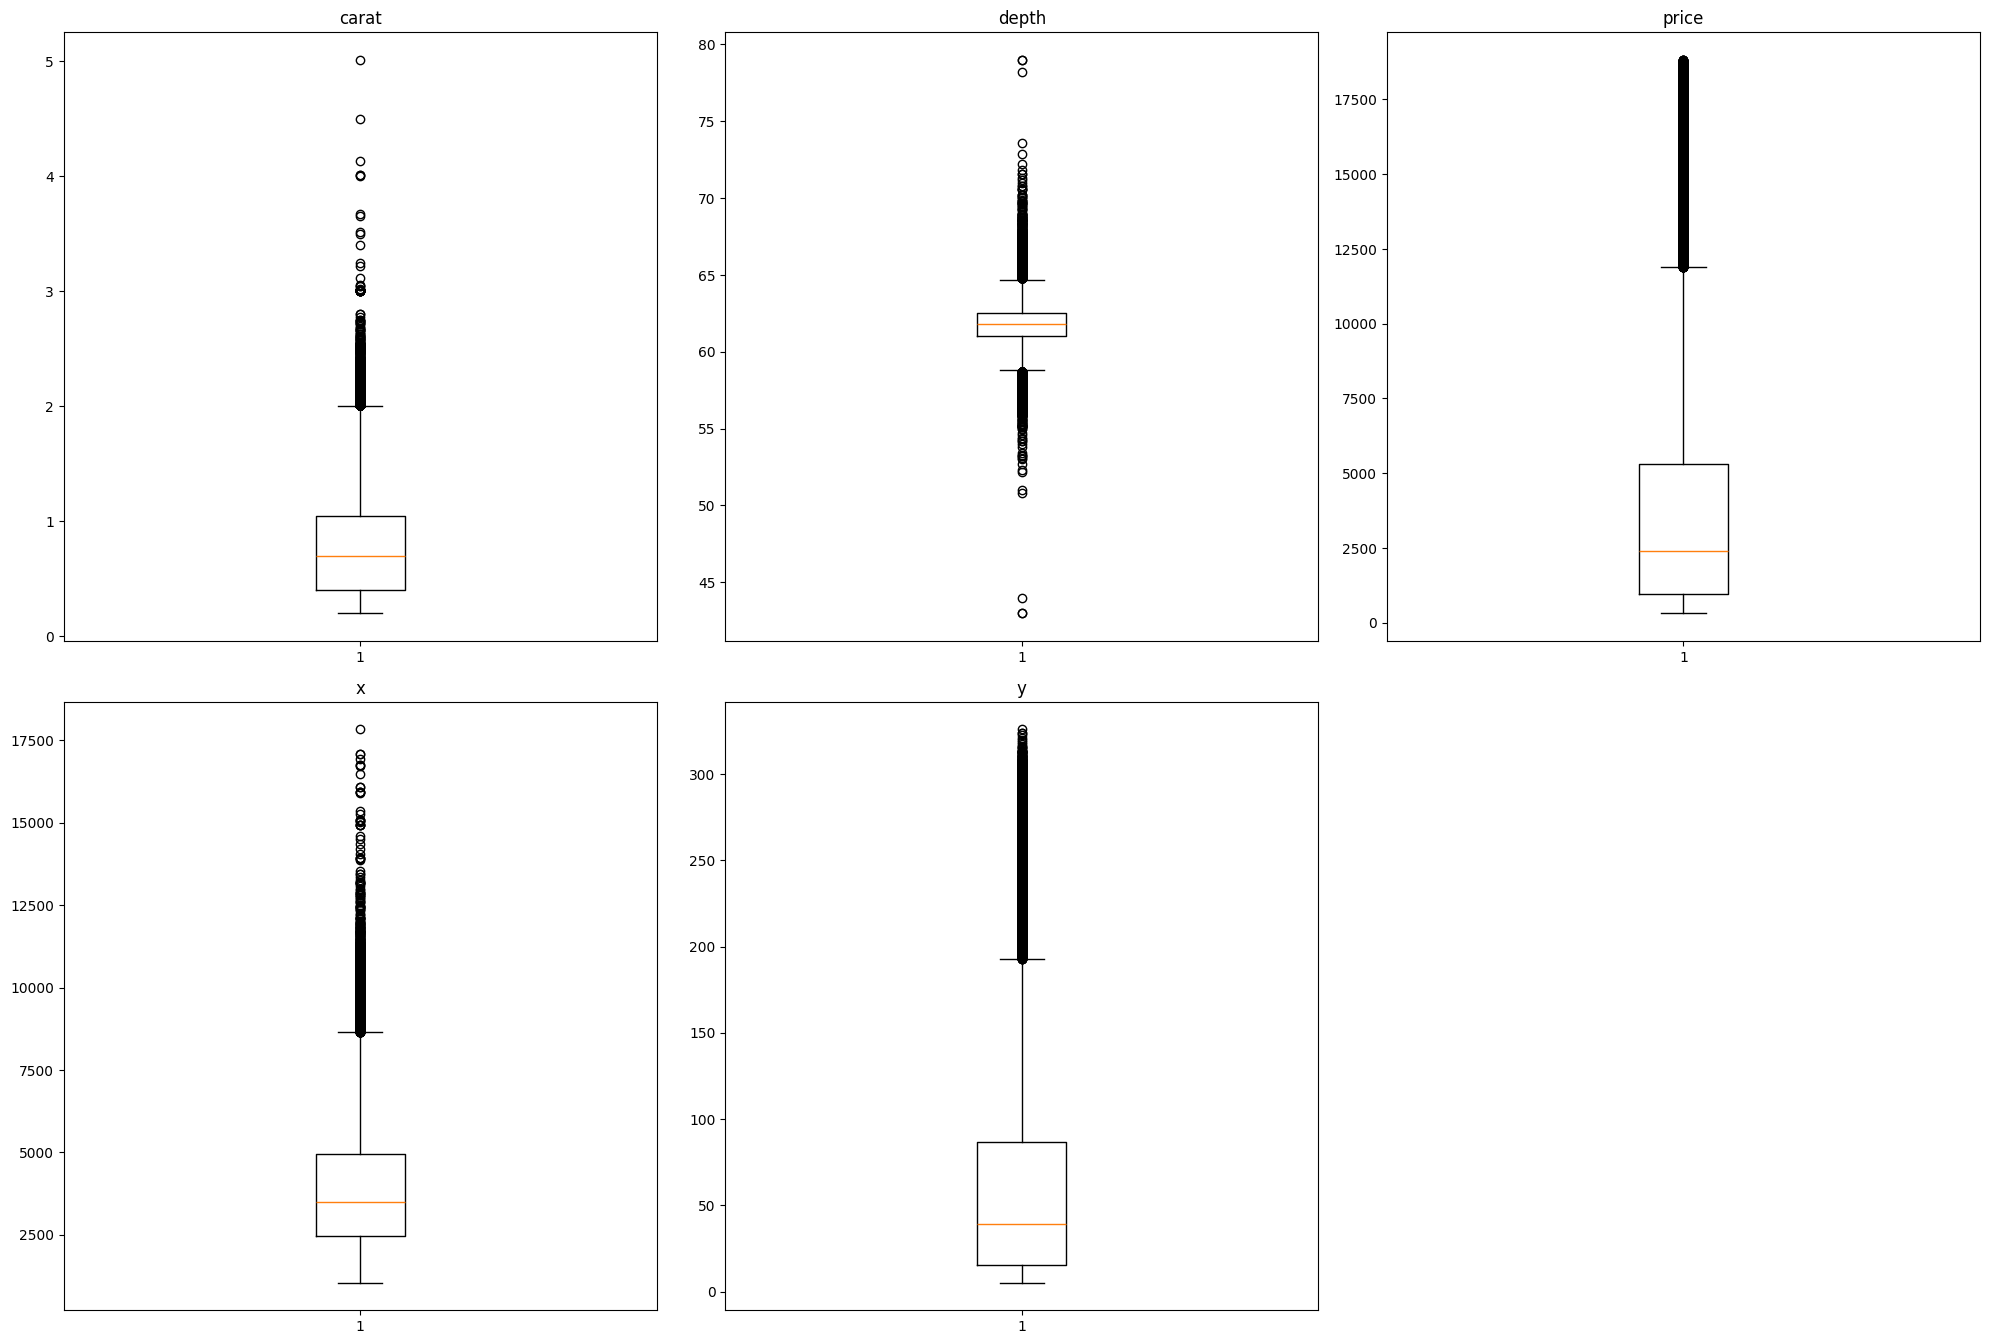

In [100]:
boxploting(cont_cols)

### removing outliers

In [101]:
def removing_outliers(columns):
    for i in columns:
        lower_quantile = diamonds_xl[i].quantile(.25)
        upper_quantile = diamonds_xl[i].quantile(.75)
        
        iqr = upper_quantile - lower_quantile
        
        upper_limit = upper_quantile + 1.5 * iqr
        lower_limit = lower_quantile - 1.5 * iqr
        
        diamonds_xl[i] = np.where(diamonds_xl[i]>upper_quantile, upper_limit, diamonds_xl[i])
        diamonds_xl[i] = np.where(diamonds_xl[i]<lower_limit, lower_limit, diamonds_xl[i])

In [102]:
removing_outliers(cont_cols.columns)

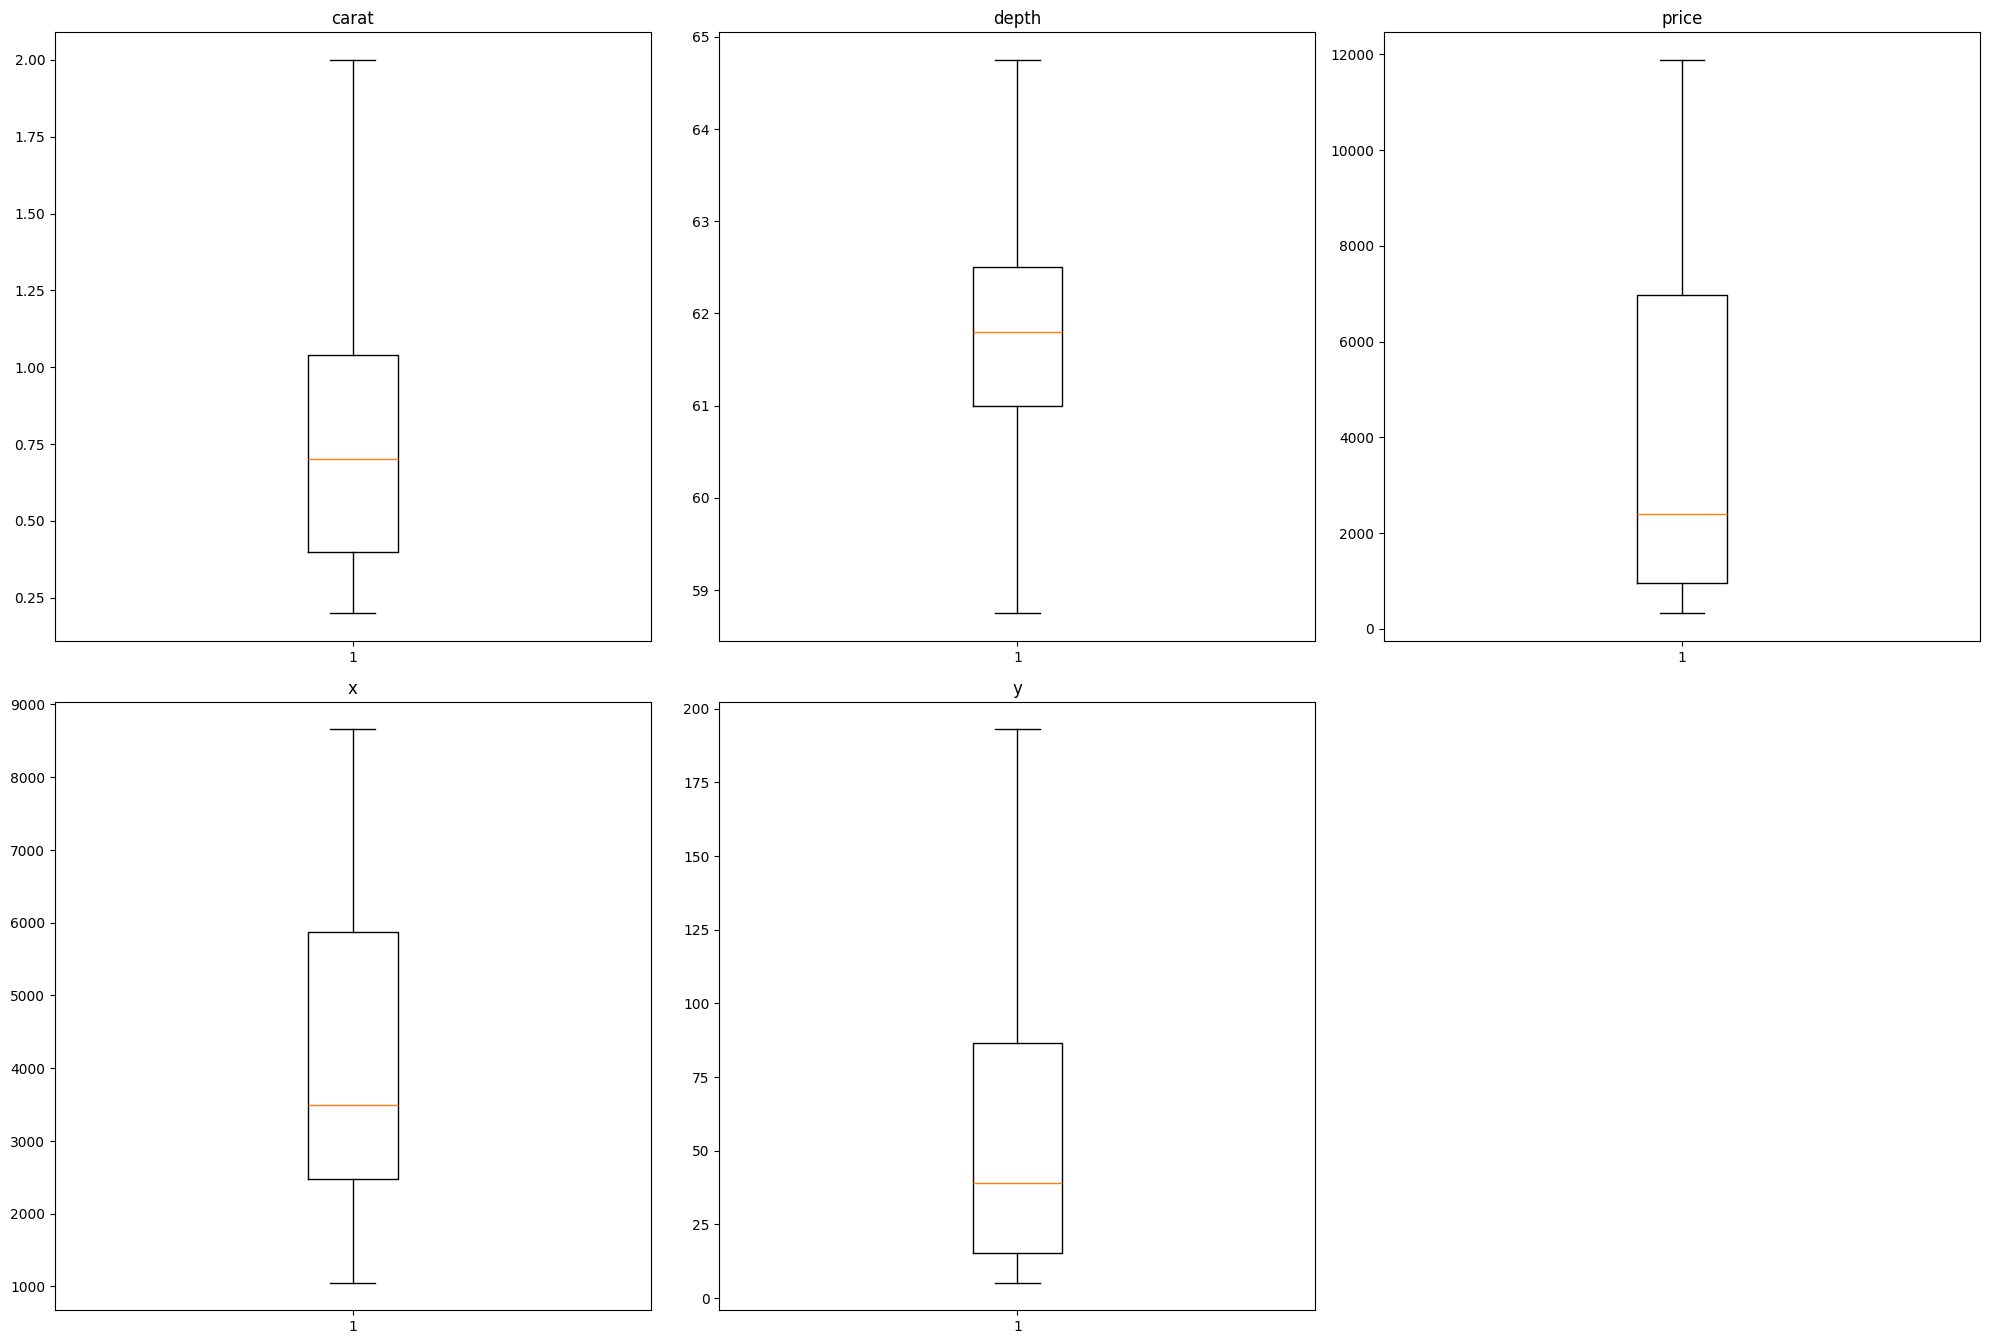

In [103]:
boxploting(cont_cols)

In [104]:
diamonds_xl.columns

Index(['carat', 'cut', 'colour', 'clarity', 'depth', 'price', 'x', 'y', 'P',
       'PC'],
      dtype='object')

### Relationships (`target = price`)

1. cont to cont

In [105]:
corr_matrix = cont_cols.corr()
corr_matrix

,carat,depth,price,x,y
carat,1.000000,0.028224,0.921591,0.769744,0.919781
depth,0.028224,1.000000,-0.010647,-0.035669,-0.035402
price,0.921591,-0.010647,1.000000,0.912377,0.999430
x,0.769744,-0.035669,0.912377,1.000000,0.912458
y,0.919781,-0.035402,0.999430,0.912458,1.000000


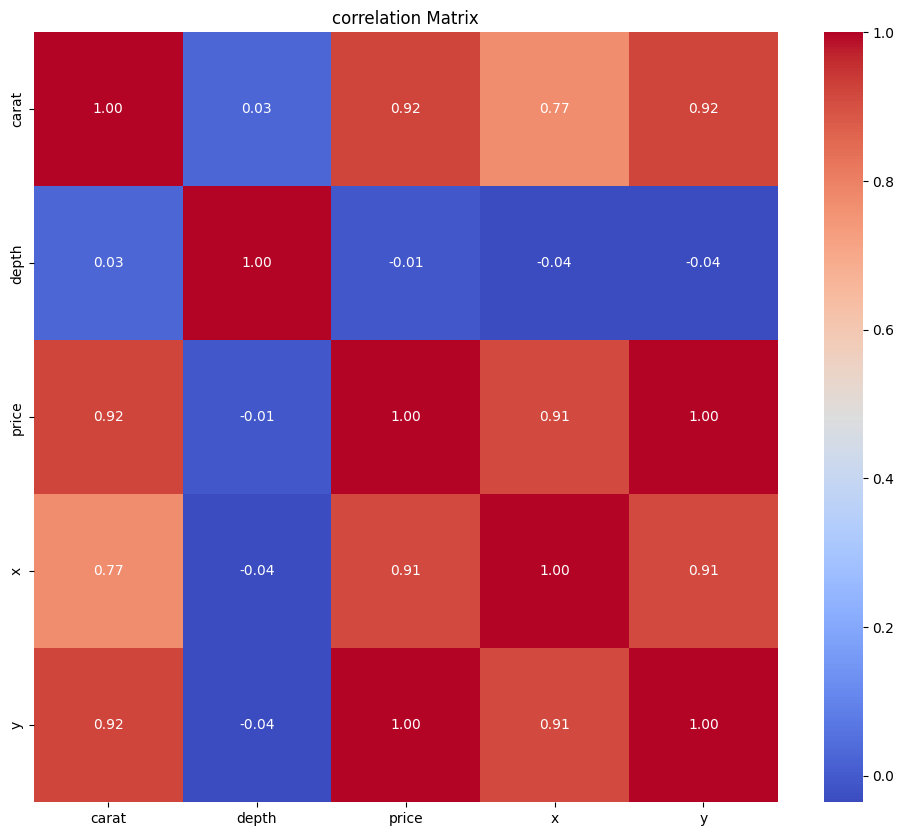

In [106]:
corr_matrix = cont_cols.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt=".2f")
plt.title('correlation Matrix')
plt.show()

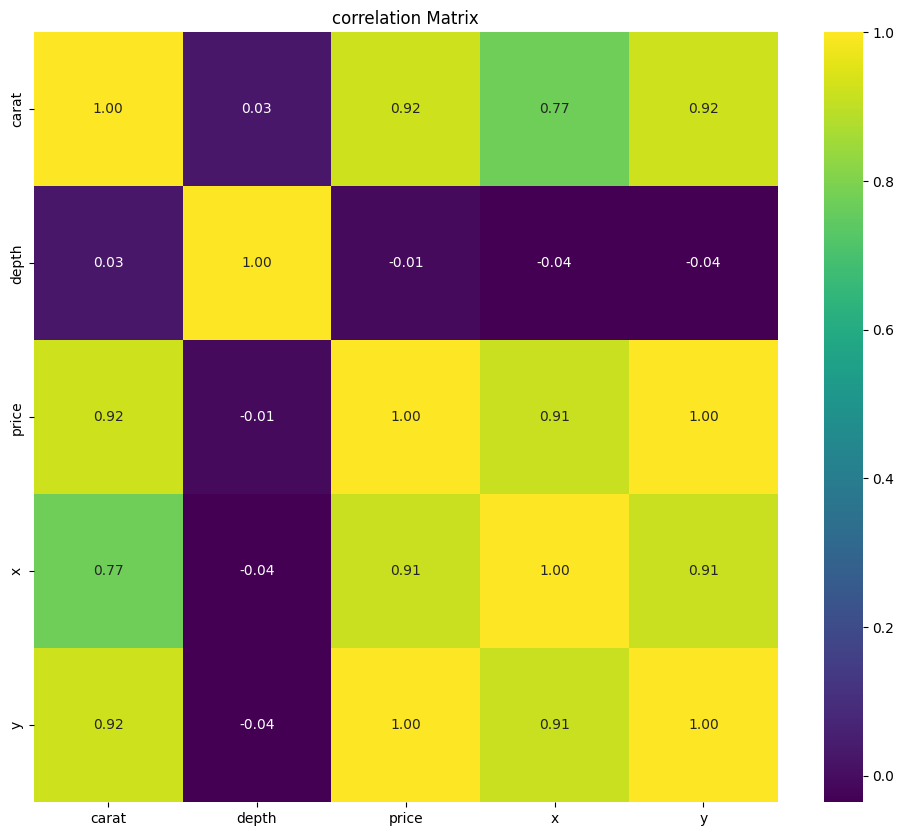

In [113]:
corr_matrix = cont_cols.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,annot=True, cmap='viridis', fmt=".2f")
plt.title('correlation Matrix')
plt.show()

- the correlated predictors are in cont are [carat, y, x]

In [107]:
diamonds_xl.columns

Index(['carat', 'cut', 'colour', 'clarity', 'depth', 'price', 'x', 'y', 'P',
       'PC'],
      dtype='object')

<Axes: xlabel='carat', ylabel='price'>

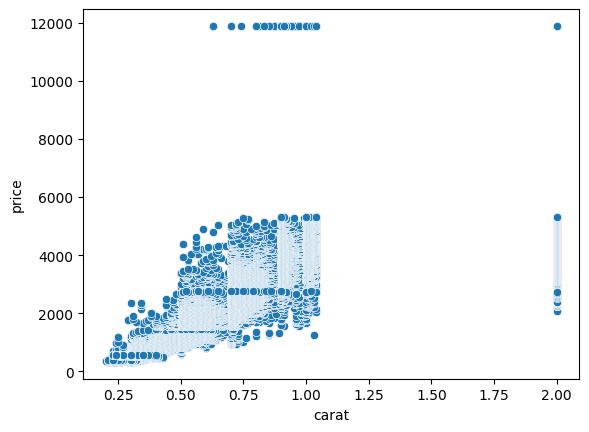

In [108]:
sns.scatterplot(diamonds_xl,x ="carat", y ="price")

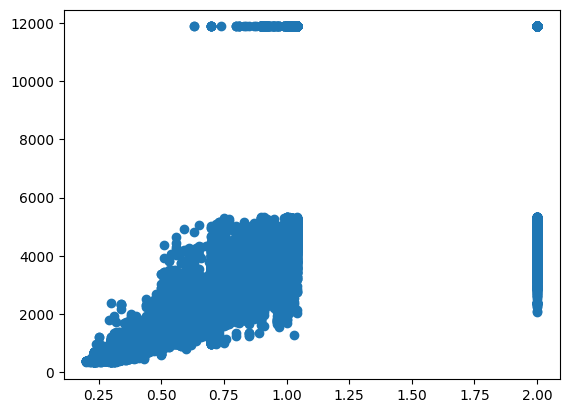

In [109]:
plt.scatter(x = diamonds_xl["carat"], y = diamonds_xl["price"])
plt.show()

2. cont to cat


In [110]:
def combined_boxplots(data, var1, var2):
    sns.boxplot(x= data[var1], y = data[var2])
    plt.xlabel(f"{var1}")
    plt.ylabel(f"{var2}")
    plt.title(f"boxplot for {var1} vs. {var2}")
    
    
def AnovaTest(data, cont_var, cat_var):
    group_data = [
        group[cont_var].values for _, group in data.groupby(cat_var)
    ]
    
    f_statistics, p_value = f_oneway(*group_data)
    
    if p_value > 0.05:
        print(f"{cat_var} is not correlated with {cont_var}")
    elif p_value < 0.05:
        print(f"{cat_var} is correlated with {cont_var}")
    

- grouping for cat columns

In [111]:
cat_cols = diamonds_xl.select_dtypes(include=['object']).columns

cut is correlated with price


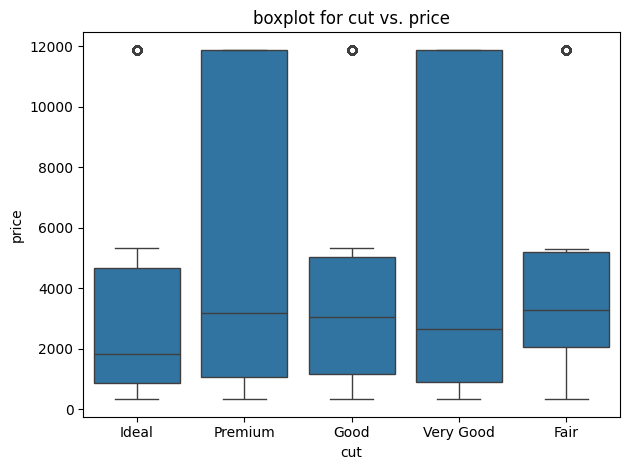

colour is correlated with price


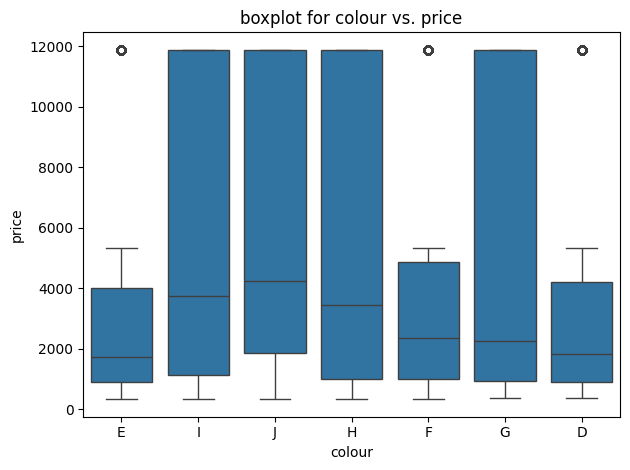

clarity is correlated with price


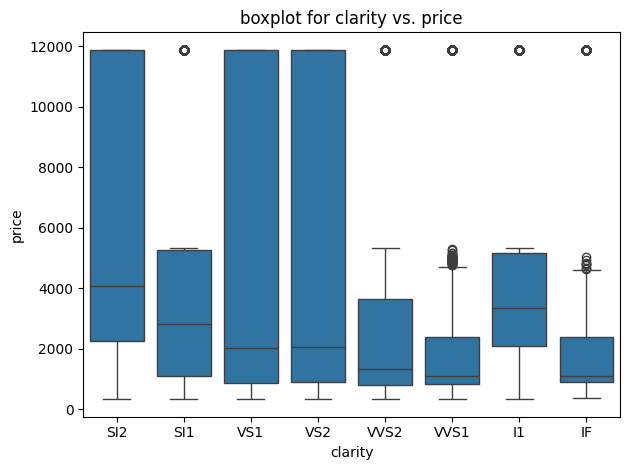

P is not correlated with price


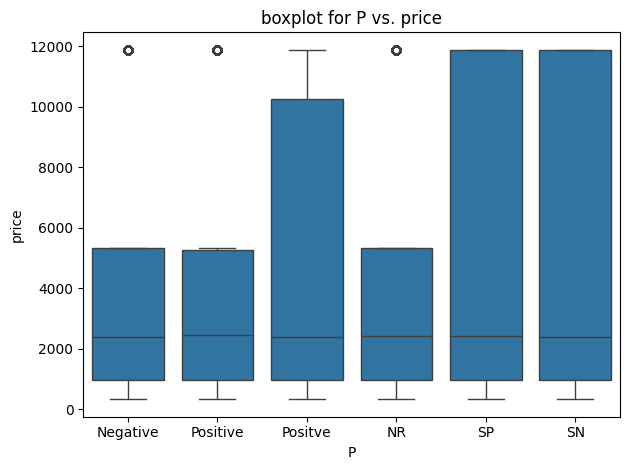

PC is not correlated with price


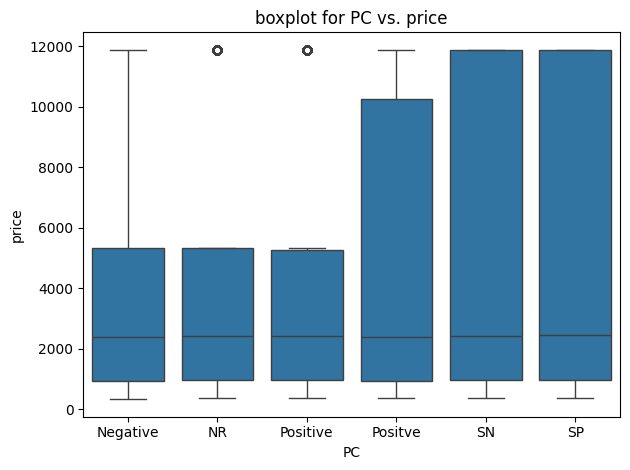

In [112]:
for i in cat_cols:
    combined_boxplots(diamonds_xl, i, "price")
    AnovaTest(diamonds_xl, "price", i)
    plt.tight_layout()
    plt.show()

- categorical values  [ cut, color, carity]